In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
consumer_key = "fehbRDMv72R4USVgOqoZ3RTO0"
consumer_secret = "IVPt2RbADTcSYHmyytoigW0bmSPfW1dxMhK4WSBxqoAkl4qcli"
access_token = "305602451-1EeF458L2GZOOsr2Ycjps0ov9m9pJlUTRXmL17sI"
access_token_secret = "gPtgxyc9gc8chqQaqJvXKieW4k3FdN7vt12Mmw7a5TTGD"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

user = api.me()
print(user.name)

viveksharma


In [5]:
tweets = []

for page in range(1,5):
    tweets.extend(api.user_timeline(screen_name="narendramodi", count=200, page=page))

print("Number of tweets extracted: {}. \n".format(len(tweets)))

Number of tweets extracted: 800. 



In [6]:
for tweet in tweets[:5]:
    print(tweet.text)

Was pleased to hold the India-Luxembourg Summit with PM @Xavier_Bettel in virtual format today. We agreed on the po… https://t.co/cmnq9msb1x
Speaking at the first ever India-Luxembourg bilateral summit with PM @Xavier_Bettel. https://t.co/xL3M2UJGCv
Invigorating the defence sector with latest technology. https://t.co/GxKhLucICE
The Government of India is working towards policy friendly measures for the IT industry. https://t.co/Xnjq4AAVxn
The Information Era is different from the Industrial Era. The Information Era brings many opportunities that our yo… https://t.co/45qL2Tg3TI


In [7]:
own_tweets = [tweet for tweet in tweets if tweet.retweeted == False and "RT @" not in tweet.text]

df = pd.DataFrame(data=[[tweet.created_at, tweet.text, len(tweet.text), tweet.id, tweet.favorite_count, tweet.retweet_count] for tweet in own_tweets], columns=['Date', 'Tweet', 'Length', 'ID', 'Likes', 'Retweets'])

In [8]:
df.head()

,Date,Tweet,Length,ID,Likes,Retweets
0,2020-11-19 15:45:40,Was pleased to hold the India-Luxembourg Summi...,140,1329450778763927553,11099,1184
1,2020-11-19 11:30:24,Speaking at the first ever India-Luxembourg bi...,108,1329386539701264385,14263,2257
2,2020-11-19 08:32:52,Invigorating the defence sector with latest te...,79,1329341861543067648,12021,1868
3,2020-11-19 08:32:39,The Government of India is working towards pol...,112,1329341807834980352,8003,1395
4,2020-11-19 08:32:28,The Information Era is different from the Indu...,140,1329341762704265216,6776,1383


In [9]:
df[df['Likes']==df['Likes'].max()]

,Date,Tweet,Length,ID,Likes,Retweets
129,2020-11-07 18:37:46,Congratulations @JoeBiden on your spectacular ...,140,1325145433828593664,304837,32375


In [10]:
df['Likes'].describe()

count       798.000000
mean      29499.281955
std       31482.992711
min        1151.000000
25%       11891.250000
50%       18956.000000
75%       33949.750000
max      304837.000000
Name: Likes, dtype: float64

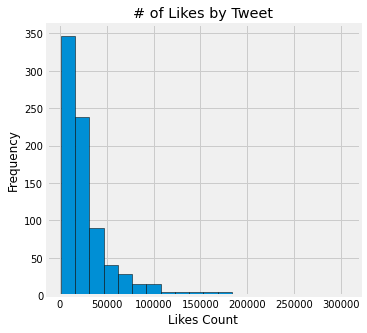

In [11]:
df['Likes'].plot(kind='hist', bins=20, figsize=(5,5), ec='black')
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.title('# of Likes by Tweet')
plt.show()

In [13]:
import nltk
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()
f = lambda tweet: vader.polarity_scores(tweet)['compound']
df['Sentiment'] = df['Tweet'].apply(f)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Date,Tweet,Length,ID,Likes,Retweets,Sentiment
0,2020-11-19,Was pleased to hold the India-Luxembourg Summi...,140,1329450778763927553,11099,1184,0.6124
1,2020-11-19,Speaking at the first ever India-Luxembourg bi...,108,1329386539701264385,14263,2257,0.0000
2,2020-11-19,Invigorating the defence sector with latest te...,79,1329341861543067648,12021,1868,0.5423
3,2020-11-19,The Government of India is working towards pol...,112,1329341807834980352,8003,1395,0.4939
4,2020-11-19,The Information Era is different from the Indu...,140,1329341762704265216,6776,1383,0.3818


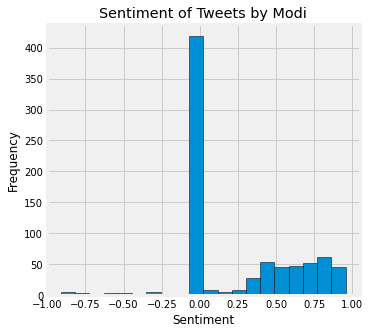

In [15]:
df['Sentiment'].plot(kind='hist', bins=20, figsize=(5,5), ec='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment of Tweets by Modi')
plt.show()

In [16]:
date_df = df.groupby(['Date']).mean().reset_index()

Text(0.5, 1.0, 'Daily Average Sentiment of Tweets')

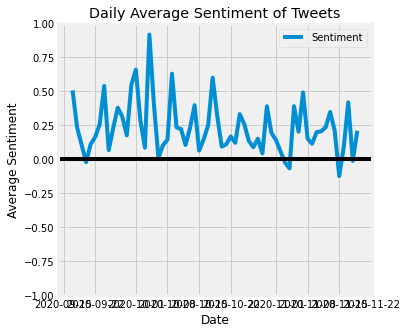

In [17]:
date_df.plot(kind='line', x='Date', y='Sentiment', figsize=(5,5), ylim=[-1,1])
plt.axhline(y=0, color='black')
plt.ylabel('Average Sentiment')
plt.title('Daily Average Sentiment of Tweets')

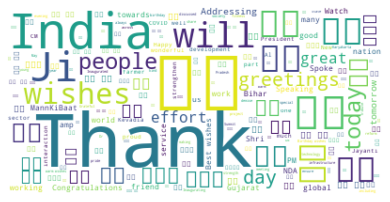

In [18]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(text for text in df.Tweet)

stopwords = set(STOPWORDS)
stopwords.update(["HTTPS", "CO"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()